## Get 20k tweets from 2018 - 2021 - general search terms

In [90]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
# create list to append tweet data to
tweets_list = []

In [92]:
# params
keywords = 'migrant OR migrants OR migrates OR migrated OR migration OR foreigner OR foreigners OR immigration OR immigrants OR immigrant OR asylum OR refugee OR refugees OR visa OR visas OR border OR borders OR deport OR deportation OR deported OR deports'

In [96]:
%%time

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{keywords} from:TheSun OR from:DailyMailUK OR from:MailOnline OR from:Daily_Express').get_items()):
    if i>40000:
        break
    if i%2==0:
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount])
tweets_list

CPU times: user 20.5 s, sys: 1.34 s, total: 21.8 s
Wall time: 11min 4s


[[datetime.datetime(2022, 6, 8, 16, 0, 6, tzinfo=datetime.timezone.utc),
  1534565944374267909,
  "Rwanda policy is having 'NO impact' on migrants: UK borders inspector says numbers crossing Channel 'have gone up' https://t.co/5cVJ8bhhG1",
  'DailyMailUK',
  2],
 [datetime.datetime(2022, 6, 8, 12, 56, tzinfo=datetime.timezone.utc),
  1534519612200562689,
  "Asylum seeker claims UK hotel stay is 'worse than prison' https://t.co/quoxBXzfCI https://t.co/Xw9PrwNLIT",
  'Daily_Express',
  8],
 [datetime.datetime(2022, 6, 8, 1, 30, 8, tzinfo=datetime.timezone.utc),
  1534347009406251008,
  'More than half the 130 asylum-seekers facing first deportation flights to Rwanda next week launch their legal battle to remain in UK https://t.co/YtUsoQP80d',
  'MailOnline',
  8],
 [datetime.datetime(2022, 6, 7, 11, 37, 57, tzinfo=datetime.timezone.utc),
  1534137584338845696,
  "'Rwanda plan is NOT working': 80 migrants land in Dover today despite bad weather https://t.co/csUgDykkcf",
  'DailyMailUK',
 

In [97]:
len(tweets_list)

21439

In [100]:
# Creating a dataframe from the tweets list above
tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username','Like Count'])
tweets_df.head(5)

,Datetime,Tweet Id,Text,Username,Like Count
0,2022-06-08 16:00:06+00:00,1534565944374267909,Rwanda policy is having 'NO impact' on migrant...,DailyMailUK,2
1,2022-06-08 12:56:00+00:00,1534519612200562689,Asylum seeker claims UK hotel stay is 'worse t...,Daily_Express,8
2,2022-06-08 01:30:08+00:00,1534347009406251008,More than half the 130 asylum-seekers facing f...,MailOnline,8
3,2022-06-07 11:37:57+00:00,1534137584338845696,'Rwanda plan is NOT working': 80 migrants land...,DailyMailUK,5
4,2022-06-05 03:29:56+00:00,1533289994584002561,Anger as hundreds of refugee children from Ukr...,MailOnline,16


In [101]:
tweets_df.tail(10)

,Datetime,Tweet Id,Text,Username,Like Count
21429,2008-08-28 16:21:59+00:00,901832768,British journalism student gang-raped by asylu...,MailOnline,0
21430,2008-08-28 10:20:49+00:00,901506433,Young British journalism student 'gang-raped b...,MailOnline,0
21431,2008-08-21 12:23:35+00:00,894310759,Immigration and births to non-British mothers ...,MailOnline,0
21432,2008-08-20 12:54:31+00:00,893204721,Thailand officials to deport laughing Glitter ...,MailOnline,0
21433,2008-08-19 12:51:42+00:00,892082485,Pictured: The trail of destruction left by bus...,MailOnline,0
21434,2008-08-19 08:51:25+00:00,891944603,One man dead and three critical in horror bus ...,MailOnline,0
21435,2008-08-18 20:22:00+00:00,891418251,One killed and up to 40 injured after migrant ...,MailOnline,0
21436,2008-08-14 12:52:03+00:00,887337505,Gary Glitter to be deported back to Britain af...,MailOnline,0
21437,2008-08-10 22:20:40+00:00,883577335,Russia tanks &#039;turned back&#039; after try...,MailOnline,0
21438,2008-08-10 19:19:10+00:00,883467151,Russia sinks Georgian warship and &#039;bomb T...,MailOnline,0


In [99]:
tweets_df.to_csv('20k_2008.csv')

## Data Exploration

In [102]:
df = tweets_df

In [103]:
df.dtypes

Datetime      datetime64[ns, UTC]
Tweet Id                    int64
Text                       object
Username                   object
Like Count                  int64
dtype: object

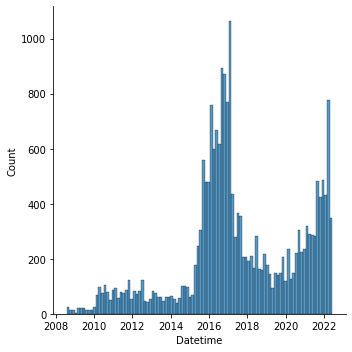

In [104]:
sns.displot(df, x="Datetime", bins=100);

### By newspaper

In [105]:
newspaper_df = df.groupby(['Username']).count()
newspaper_df = newspaper_df.reset_index()
newspaper_df

,Username,Datetime,Tweet Id,Text,Like Count
0,DailyMailUK,4157,4157,4157,4157
1,Daily_Express,8977,8977,8977,8977
2,MailOnline,5460,5460,5460,5460
3,TheSun,2845,2845,2845,2845


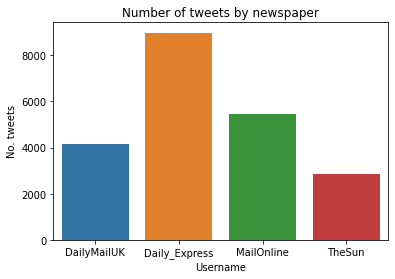

In [106]:
sns.barplot(x='Username', y='Text', data = newspaper_df)
plt.ylabel('No. tweets')
plt.title('Number of tweets by newspaper');

In [107]:
likes_df = df.groupby(['Username']).sum()
likes_df = likes_df.reset_index()
likes_df

,Username,Tweet Id,Like Count
0,DailyMailUK,3.979715e+21,66321
1,Daily_Express,7.792549e+21,47876
2,MailOnline,4.815612e+21,175052
3,TheSun,2.632484e+21,36191


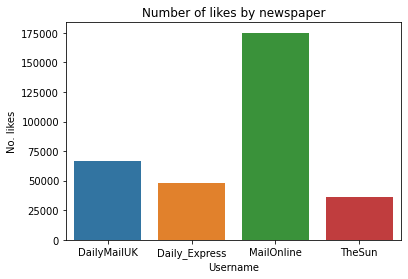

In [108]:
sns.barplot(x='Username', y='Like Count', data = likes_df)
plt.ylabel('No. likes')
plt.title('Number of likes by newspaper');